# POS

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv("POS.csv").convert_dtypes()

### Rows and columns 

In [13]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 13


In [4]:
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce').dt.date
df = df.convert_dtypes()
df = df.set_index(['date']).sort_index()
df = df.drop(columns=['yearmon'])

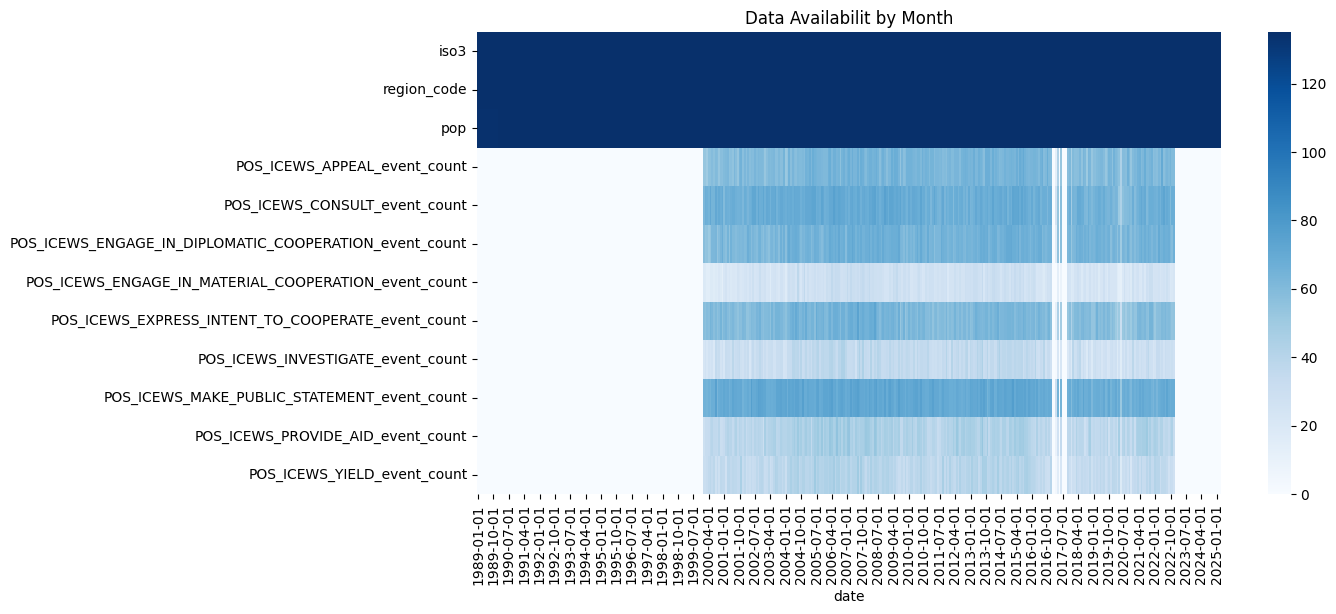

In [5]:
missing_by_month = df.groupby('date').count()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

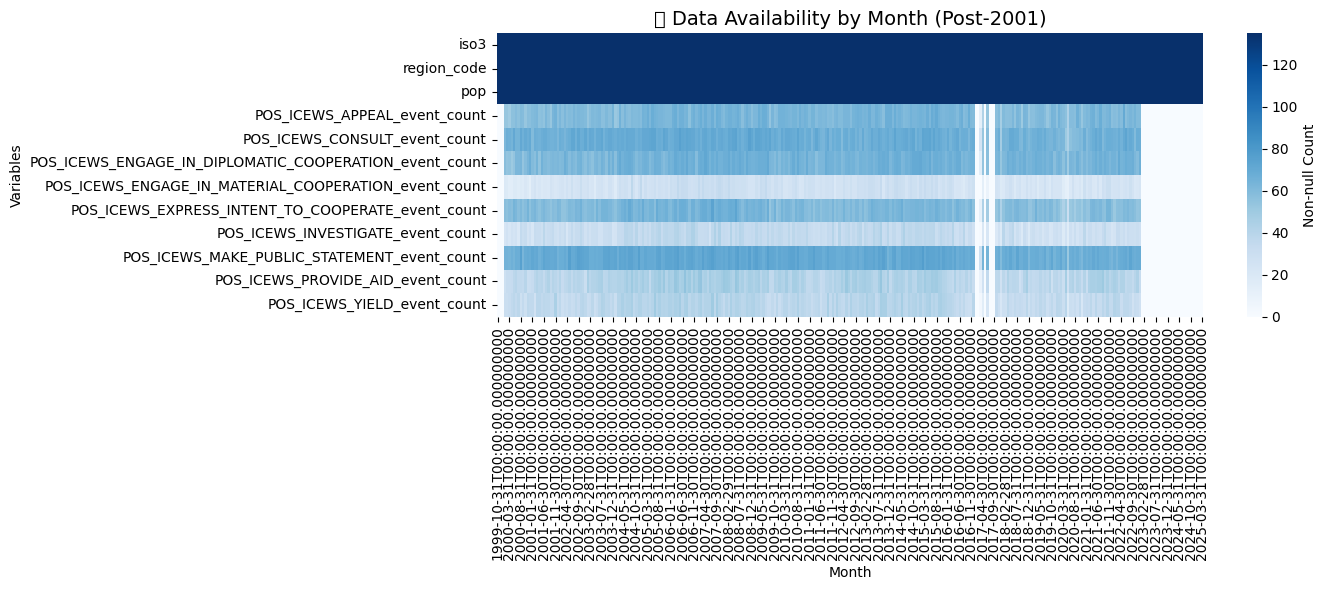

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert 'yearmon' to datetime format
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce')

# Step 2: Drop rows before 2001
df = df[df['date'] >= pd.to_datetime('1999-10-01')]

# Step 3: Set 'date' as index
df = df.set_index('date').sort_index()

# Step 4: Drop the original 'yearmon' column (optional)
df = df.drop(columns=['yearmon'])

# Step 5: Group by month and count non-null values
missing_by_month = df.groupby(pd.Grouper(freq='M')).count()

# Step 6: Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues', cbar_kws={'label': 'Non-null Count'})
plt.title('📅 Data Availability by Month (Post-2001)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


### Sample data and features

In [15]:
df.tail().T

date,2025-03-01,2025-03-01,2025-03-01,2025-03-01,2025-03-01
iso3,SLE,DOM,SLB,LKA,ZWE
region_code,SSA,LAC,EAP,SAR,SSA
pop,8460512.0,11331265.0,800005.0,22037000.0,16340822.0
POS_ICEWS_APPEAL_event_count,<NA>,<NA>,<NA>,<NA>,<NA>
POS_ICEWS_CONSULT_event_count,<NA>,<NA>,<NA>,<NA>,<NA>
POS_ICEWS_ENGAGE_IN_DIPLOMATIC_COOPERATION_event_count,<NA>,<NA>,<NA>,<NA>,<NA>
POS_ICEWS_ENGAGE_IN_MATERIAL_COOPERATION_event_count,<NA>,<NA>,<NA>,<NA>,<NA>
POS_ICEWS_EXPRESS_INTENT_TO_COOPERATE_event_count,<NA>,<NA>,<NA>,<NA>,<NA>
POS_ICEWS_INVESTIGATE_event_count,<NA>,<NA>,<NA>,<NA>,<NA>
POS_ICEWS_MAKE_PUBLIC_STATEMENT_event_count,<NA>,<NA>,<NA>,<NA>,<NA>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58725 entries, 1989-01-01 to 2025-03-01
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   iso3                                                    58725 non-null  string 
 1   region_code                                             58725 non-null  string 
 2   pop                                                     58713 non-null  Float64
 3   POS_ICEWS_APPEAL_event_count                            16533 non-null  Int64  
 4   POS_ICEWS_CONSULT_event_count                           18174 non-null  Int64  
 5   POS_ICEWS_ENGAGE_IN_DIPLOMATIC_COOPERATION_event_count  17256 non-null  Int64  
 6   POS_ICEWS_ENGAGE_IN_MATERIAL_COOPERATION_event_count    6934 non-null   Int64  
 7   POS_ICEWS_EXPRESS_INTENT_TO_COOPERATE_event_count       16333 non-null  Int64  
 8   POS_ICEWS_INVESTIGATE_event

### Descriptive statistics of categorical columns

In [ ]:
df.describe(include='string').T

,count,unique,top,freq
iso3,58725,135,AFG,435
region_code,58725,6,SSA,20445


### Descriptive statistics of numerical columns

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,58713.0,41259533.486332,153319719.021372,8662.0,2108617.0,8303151.0,25698326.0,1438069596.0
POS_ICEWS_APPEAL_event_count,16533.0,28.623843,83.259934,1.0,3.0,8.0,23.0,1486.0
POS_ICEWS_CONSULT_event_count,18174.0,81.713437,168.934981,1.0,8.0,25.0,80.0,3080.0
POS_ICEWS_ENGAGE_IN_DIPLOMATIC_COOPERATION_event_count,17256.0,25.865322,47.288599,1.0,4.0,10.0,27.0,1042.0
POS_ICEWS_ENGAGE_IN_MATERIAL_COOPERATION_event_count,6934.0,4.355783,5.910205,1.0,1.0,2.0,5.0,68.0
POS_ICEWS_EXPRESS_INTENT_TO_COOPERATE_event_count,16333.0,30.628176,66.078014,1.0,3.0,9.0,29.0,840.0
POS_ICEWS_INVESTIGATE_event_count,8805.0,7.036343,19.703494,1.0,1.0,2.0,6.0,266.0
POS_ICEWS_MAKE_PUBLIC_STATEMENT_event_count,18895.0,70.831649,188.003725,1.0,5.0,17.0,56.0,3464.0
POS_ICEWS_PROVIDE_AID_event_count,11269.0,6.96761,15.482803,1.0,1.0,3.0,6.0,440.0
POS_ICEWS_YIELD_event_count,10136.0,8.476618,17.460733,1.0,1.0,3.0,8.0,268.0


### Deatils of missing values in the features

In [16]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
POS_ICEWS_ENGAGE_IN_MATERIAL_COOPERATION_event_count,34376,83.21
POS_ICEWS_INVESTIGATE_event_count,32505,78.69
POS_ICEWS_YIELD_event_count,31174,75.46
POS_ICEWS_PROVIDE_AID_event_count,30041,72.72
POS_ICEWS_EXPRESS_INTENT_TO_COOPERATE_event_count,24977,60.46
POS_ICEWS_APPEAL_event_count,24777,59.98
POS_ICEWS_ENGAGE_IN_DIPLOMATIC_COOPERATION_event_count,24054,58.23
POS_ICEWS_CONSULT_event_count,23136,56.01
POS_ICEWS_MAKE_PUBLIC_STATEMENT_event_count,22415,54.26
pop,0,0.00


In [18]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 70].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


In [19]:
missing_by_iso3 = df.groupby('iso3').count()
missing_by_month = df.groupby('date').count()

### Availability of data by country

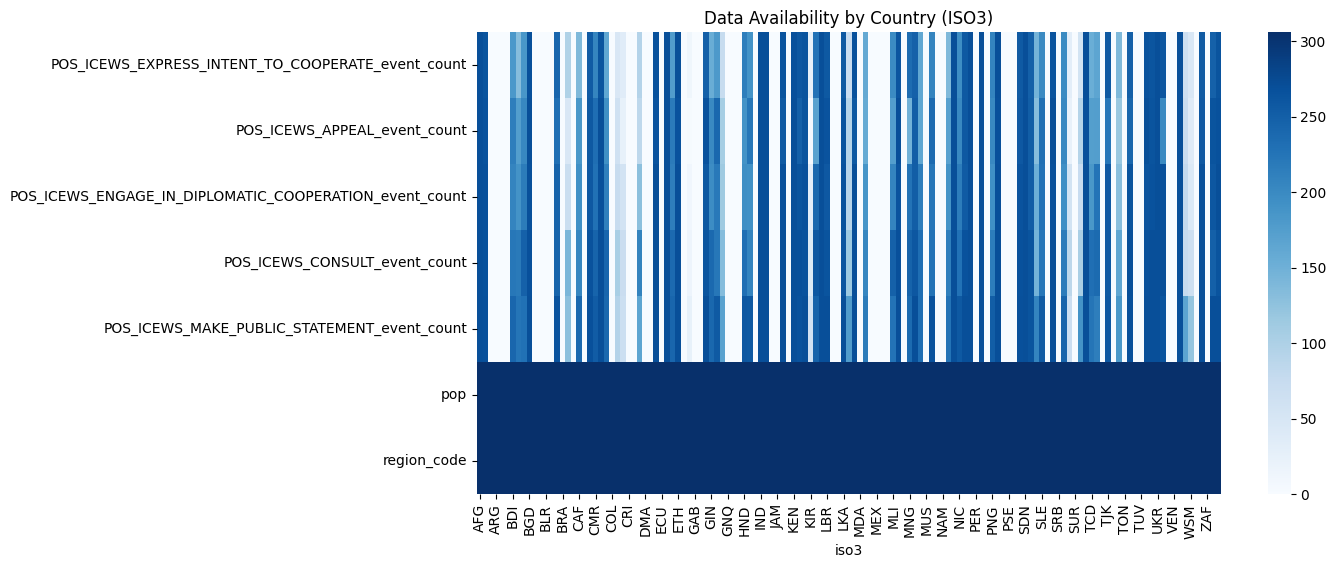

In [25]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_iso3.astype(float).T, cmap='Blues')
plt.title('Data Availability by Country (ISO3)')
plt.show()

### Availability of data by month

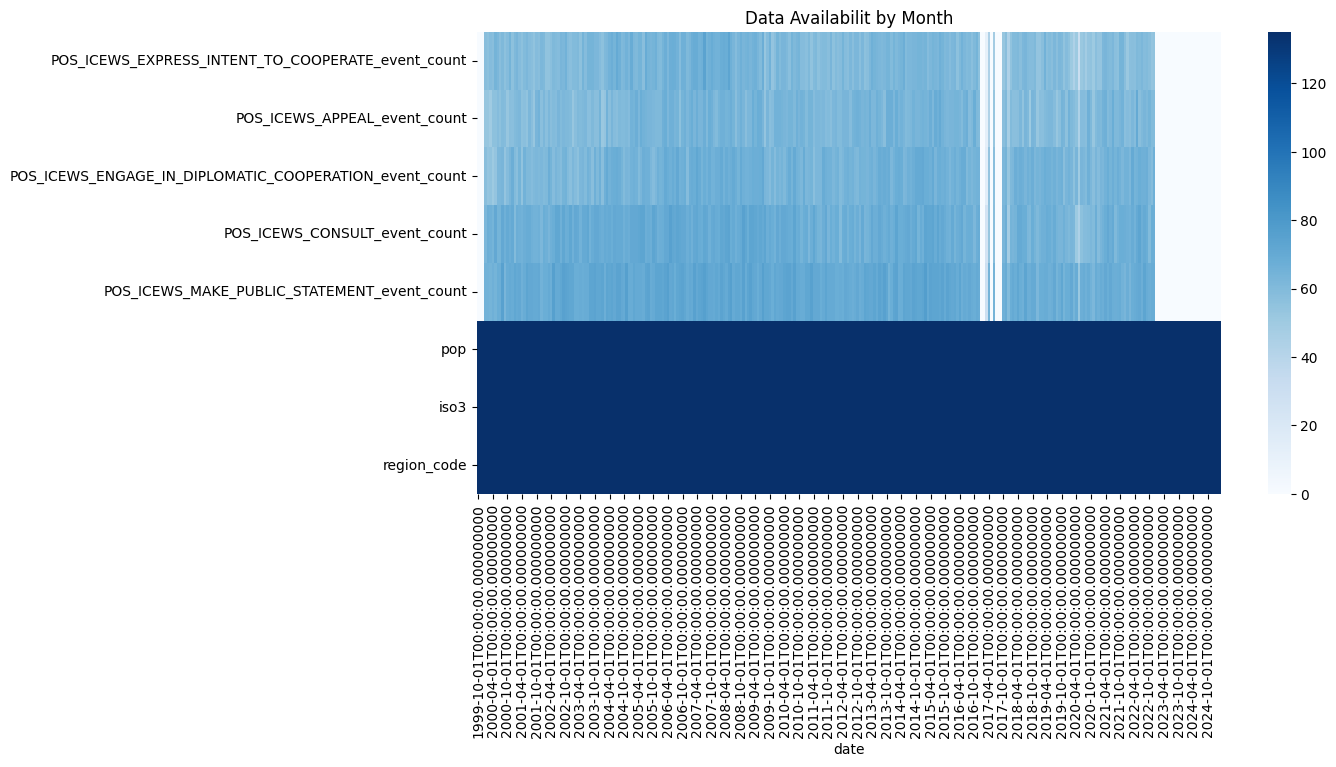

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [22]:
#Correlation Matrix
correlation_matrix_df = numeric_df.corr(method='pearson')

### Correlation between the features

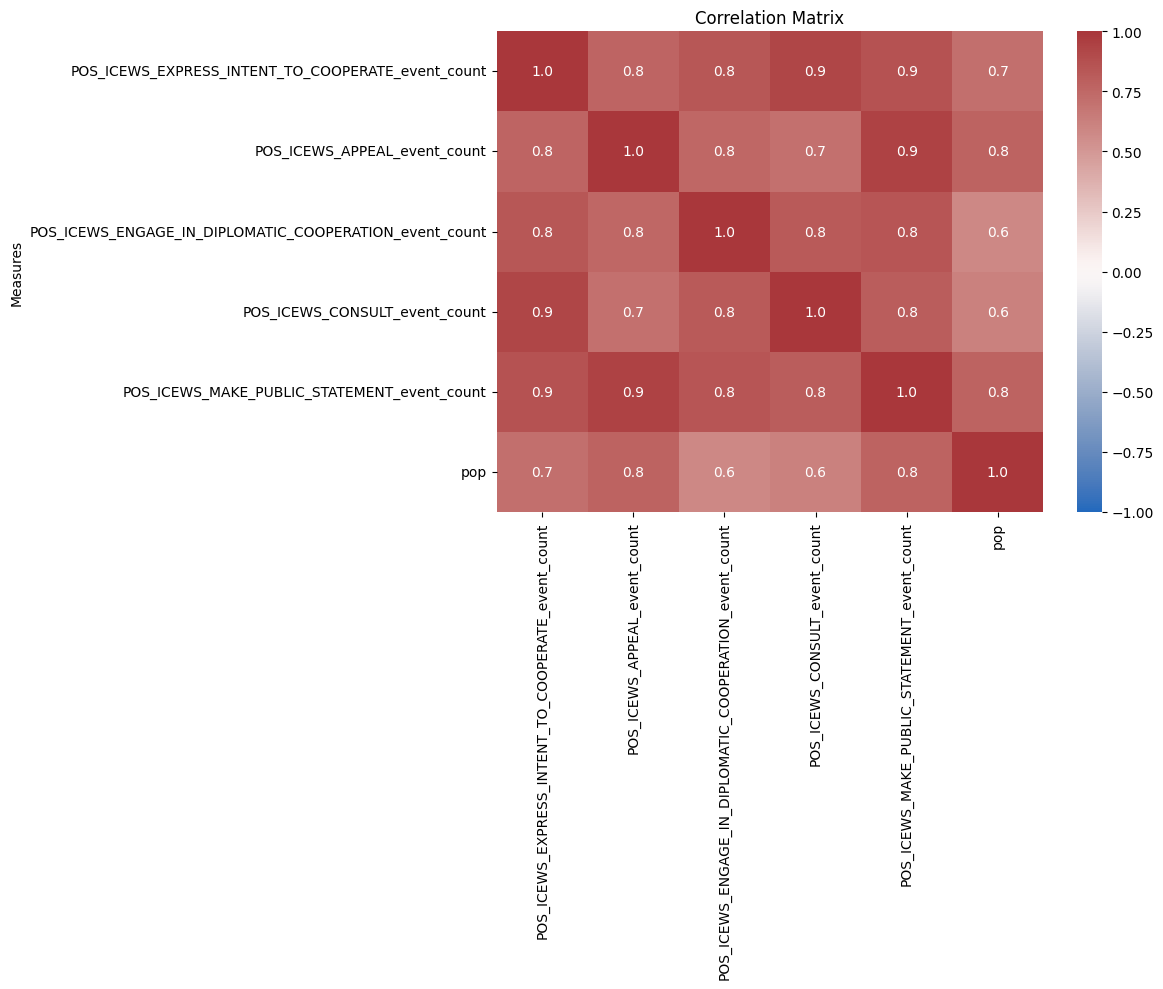

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

In [24]:
numeric_df.shape

(13608, 6)

### Principal Components Analysis of the features

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)
pca = PCA(n_components=0.75)
X_pca = pca.fit_transform(X_scaled)
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")
columns = [f'PC{i+1}' for i in range(n_components)]
print(f"Column names for PCA components: {columns}")

Number of components retained: 1
Column names for PCA components: ['PC1']


In [30]:
pca_df = pd.DataFrame(X_pca, index=numeric_df.index, columns=columns)

In [31]:
pca_correlation_matrix_df = pca_df.corr(method='pearson')

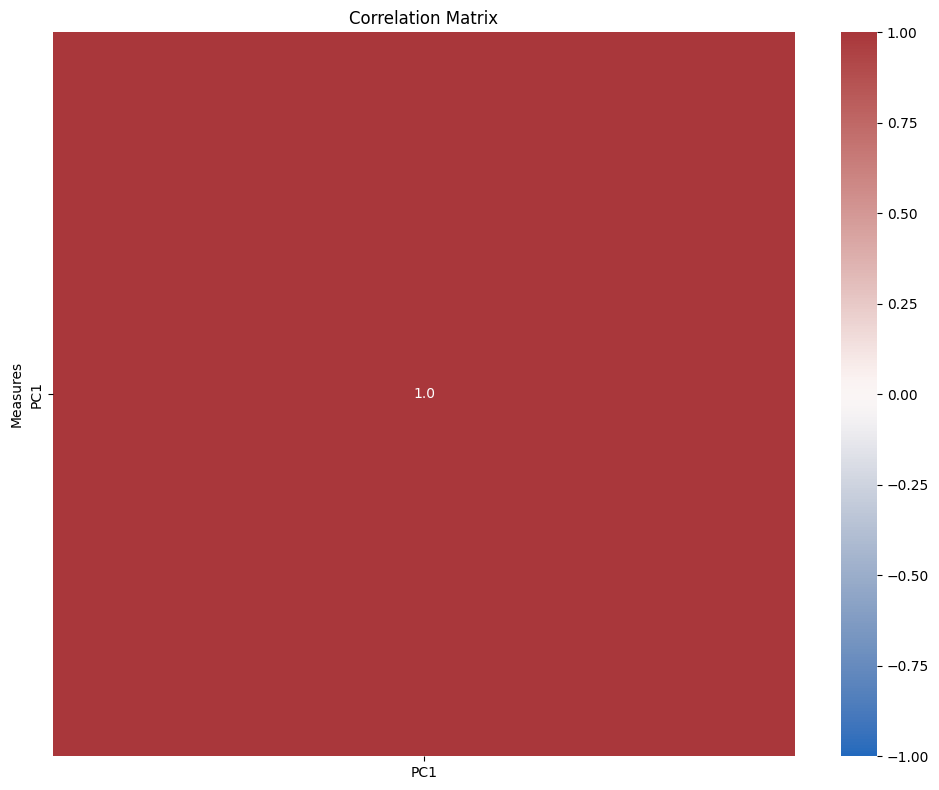

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Explained Variance by Principal Component

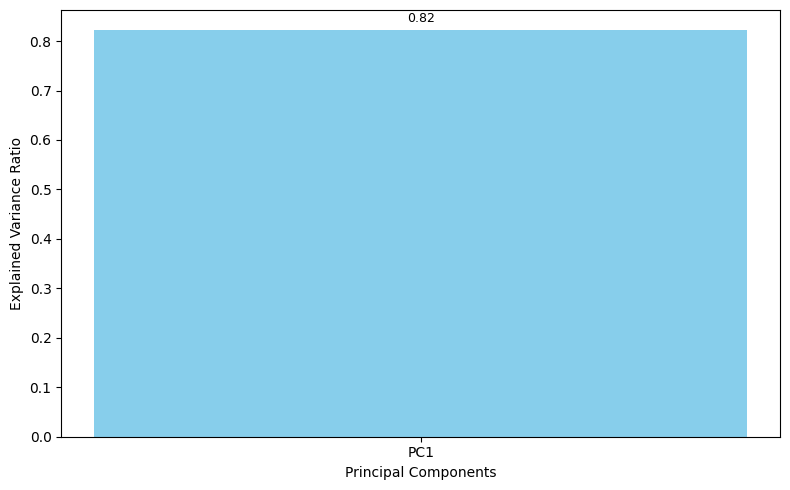

In [33]:
# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
labels = [f'PC{i}' for i in components]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(x=components, height=explained_variance, tick_label=labels, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
# plt.title('Explained Variance by Principal Component')
plt.tight_layout()
plt.show()

### Cumulative Explained Variance

Component 2 exceeds the total number of components (1).


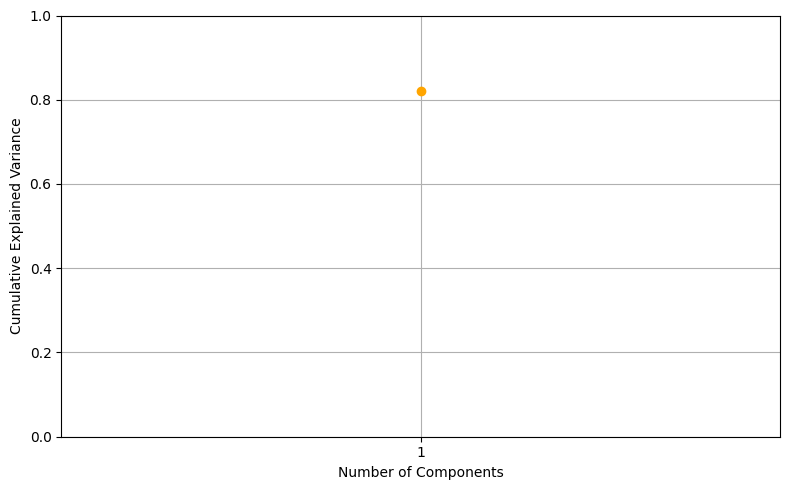

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` has already been fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Specify the component number (e.g., n = 4)
n = 2 # Change this to your desired component index
if n <= len(cumulative_variance):
    print(f"Cumulative explained variance at component {n}: {cumulative_variance[n-1]:.4f}")
else:
    print(f"Component {n} exceeds the total number of components ({len(cumulative_variance)}).")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
feature_names = numeric_df.columns
components = pca.components_
loadings_df = pd.DataFrame(components.T, index=feature_names, columns=[f'PC{i+1}' for i in range(components.shape[0])])

### PCA Loadings Heatmap

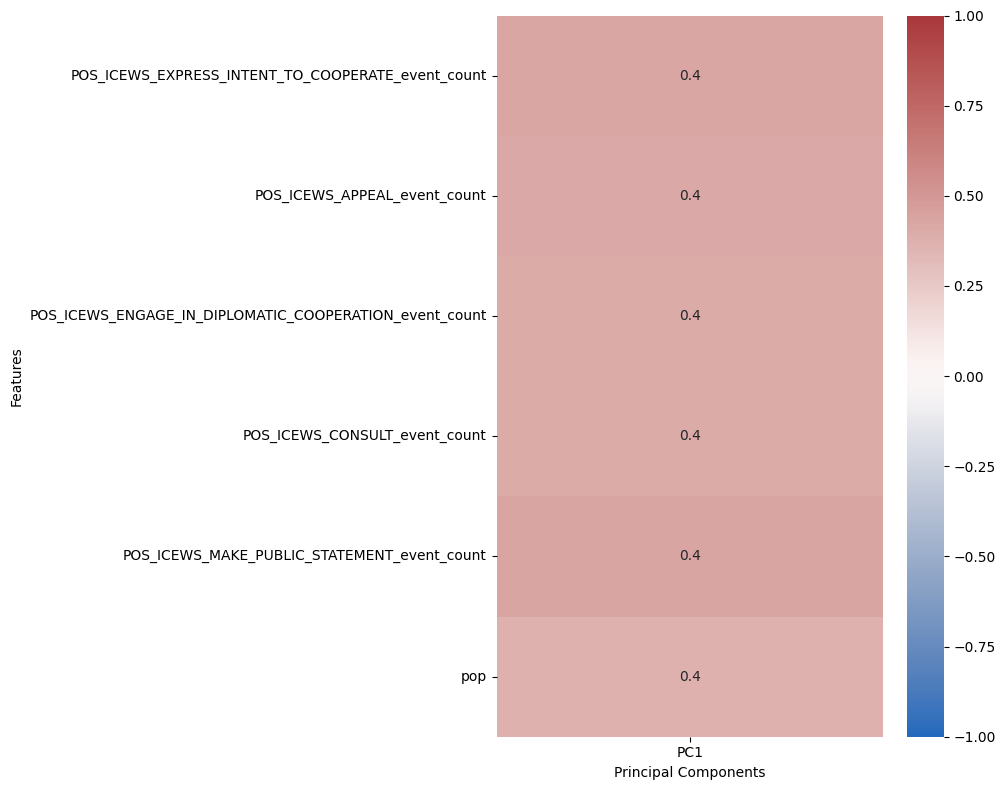

In [36]:
# create heatmap from loadings_df using sns
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
# plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [37]:
# Print PCA loadings matrix as plain text
print("🔢 PCA Loadings Matrix:\n")
print(loadings_df.round(2))  # Round to 2 decimal places for readability


🔢 PCA Loadings Matrix:

                                                     PC1
POS_ICEWS_EXPRESS_INTENT_TO_COOPERATE_event_count   0.42
POS_ICEWS_APPEAL_event_count                        0.41
POS_ICEWS_ENGAGE_IN_DIPLOMATIC_COOPERATION_even...  0.40
POS_ICEWS_CONSULT_event_count                       0.41
POS_ICEWS_MAKE_PUBLIC_STATEMENT_event_count         0.43
pop                                                 0.37


## Physical Interpretation

### PC1- Diplomatic & Cooperative Political Communication Index, This principal component reflects positive, cooperative international behavior, especially in terms of diplomatic signaling and public communication. High loadings on intent to cooperate, consultation, public statements, and diplomatic cooperation suggest this component captures peaceful political outreach and alliance-building.